In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd

In [130]:
# data = pd.read_csv('Naive algorithm experiment.csv')
# data_other = pd.read_csv('Naive algorithm experiment_other-data.csv')
data = pd.read_csv('Naive algorithm experiment_TEST.csv')
data_other = pd.read_csv('Naive algorithm experiment_other-data_TEST.csv')
data

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,can_flag,naive_alg_steps,parameters_id,task_id
0,2,0,0.032258,25,15,0.006399,Beginner (8x8),10x10,True,NaN,False,False,0.0,2,2
1,2,2,0.045725,19,14,0.004429,Beginner (8x8),10x10,True,NaN,True,False,0.0,1,1
2,2,1,0.045208,25,15,0.005195,Beginner (9x9),11x11,True,NaN,False,False,0.0,4,4
3,4,4,0.048952,22,21,0.013809,Beginner (9x9),11x11,True,NaN,True,False,0.0,3,3
4,4,3,0.035132,29,26,0.008957,Beginner (8x8),10x10,True,NaN,True,False,1.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,2,0,1.167241,107,92,0.303741,Expert (16x30),18x32,True,NaN,False,True,4.0,88,4792
4796,2,1,1.746871,114,102,0.453387,Expert (16x30),18x32,True,NaN,True,True,3.0,79,4783
4797,2,1,1.437004,114,102,0.403438,Expert (16x30),18x32,True,NaN,True,True,4.0,87,4791
4798,2,1,0.999803,114,102,0.244654,Expert (16x30),18x32,True,NaN,True,True,NaN,95,4799


In [4]:
data_other

,first_click_pos,sample_size,num_games,verbose,visualise,agent_seed,run_seed,batch_size,num_processes
0,NaN,NaN,1000,False,False,50,5050,5,6


In [131]:
# Placed into a function so that it can be reused in main experiment analysis (for solver comparisons)
def process_naive_alg_results(df_original):
    # Group by combinations of experiment parameters
    df = data.groupby('parameters_id').sum()[['wins', 'wins_without_guess', 'time_elapsed', 'samples_considered', 'samples_with_solutions', 'samples_solve_duration_total']]
    df2 = data.groupby('parameters_id').first()[['difficulty', 'sample_size', 'use_num_mines_constraint', 'first_click_pos', 'first_click_is_zero', 'naive_alg_steps', 'can_flag']]
    df3 = df.join(df2)
    
    # Calculate win rates
    num_games = int(data_other['num_games'])
    df3['win rate (%)'] = (df3['wins'] / num_games) * 100
    df3['win rate without guess (%)'] = (df3['wins_without_guess'] / num_games) * 100
    
    # Fill null steps limit with something more descriptive
    df3 = df3.fillna(value={'naive_alg_steps': 'Unlimited'})
    
    return df3

In [136]:
df = process_naive_alg_results(data)
df

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,can_flag,win rate (%),win rate without guess (%)
parameters_id,,,,,,,,,,,,,,,
1,136,74,2.017326,1233,844,0.425680,Beginner (8x8),10x10,True,NaN,True,0.0,False,54.4,29.6
2,98,27,1.921707,1224,560,0.309447,Beginner (8x8),10x10,True,NaN,False,0.0,False,39.2,10.8
3,205,154,1.969015,1112,923,0.400406,Beginner (9x9),11x11,True,NaN,True,0.0,False,82.0,61.6
4,163,51,2.265887,1195,696,0.382595,Beginner (9x9),11x11,True,NaN,False,0.0,False,65.2,20.4
5,120,56,17.079901,2488,1998,3.848908,Intermediate (16x16),18x18,True,NaN,True,0.0,False,48.0,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,192,75,2.246428,1077,710,0.602820,Beginner (9x9),11x11,True,NaN,False,Unlimited,True,76.8,30.0
93,202,155,17.921706,2234,2099,5.946693,Intermediate (16x16),18x18,True,NaN,True,Unlimited,True,80.8,62.0
94,137,38,16.838537,1970,1435,6.375683,Intermediate (16x16),18x18,True,NaN,False,Unlimited,True,54.8,15.2


# Analysis

In [137]:
sns.set_theme()

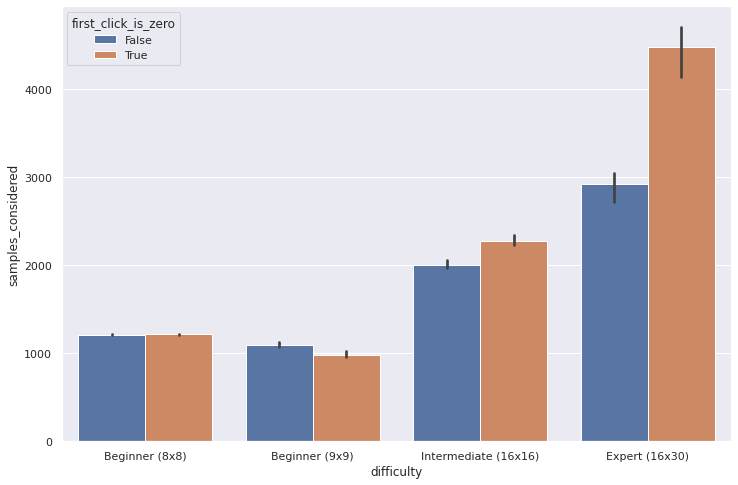

In [138]:
sns.barplot(x='difficulty', y='samples_considered', hue='first_click_is_zero', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

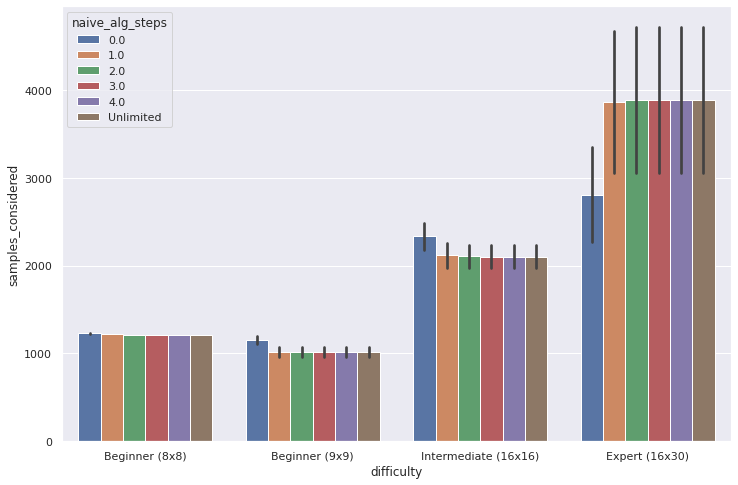

In [139]:
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

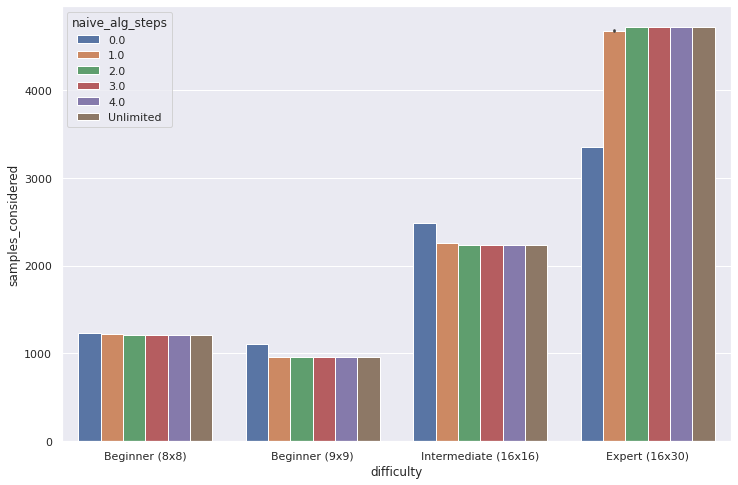

In [141]:
df2 = df[df['first_click_is_zero'] == True]
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df2)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

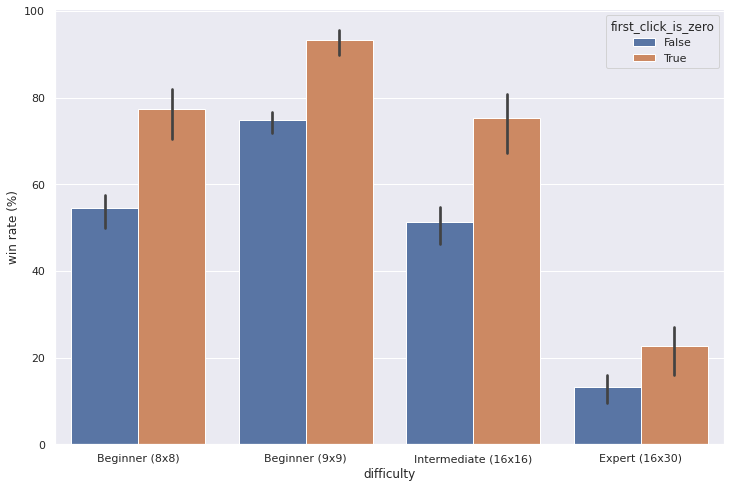

In [142]:
sns.barplot(x='difficulty', y='win rate (%)', hue='first_click_is_zero', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

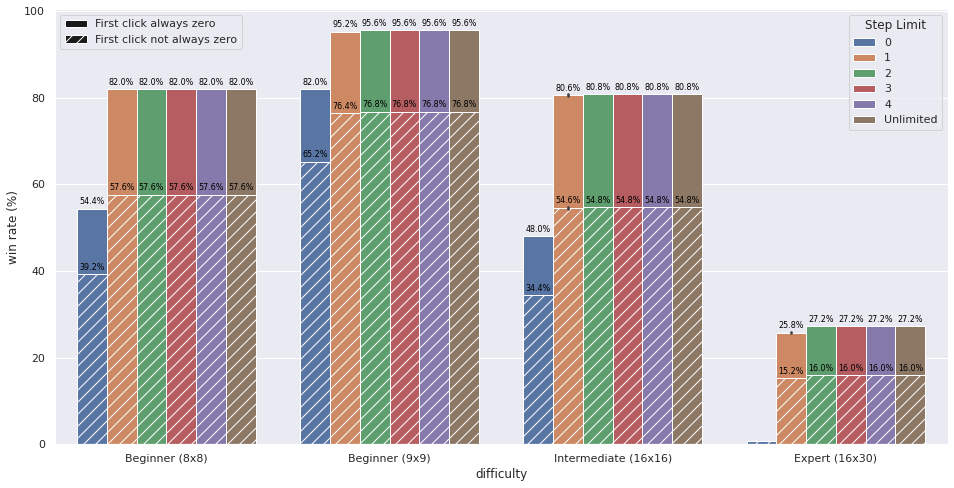

In [143]:
df2 = df[df['first_click_is_zero'] == True]
df3 = df[df['first_click_is_zero'] == False]

g = sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df2, palette='deep')
sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df3, palette='deep', hatch='//')

for p in g.patches:
    if p.get_height() < 1:
        continue
        
    g.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=8, color='black', xytext=(0, 7),
     textcoords='offset points')


fig = plt.gcf()
fig.set_size_inches(16, 8)


# Get/create patches (coloured boxes to display in legend)
patches = g.legend_.get_patches()[:6]
patch1 = Patch(facecolor='k', edgecolor='w')
patch2 = Patch(facecolor='k', edgecolor='w', hatch='//')

# Add both legends
legend1 = plt.legend([patch1, patch2], ["First click always zero", "First click not always zero"], loc=2)
plt.legend(title="Step Limit", handles=patches, labels=['0', '1', '2', '3', '4', 'Unlimited'], loc=1)
plt.gca().add_artist(legend1)

plt.show()

In [98]:
a = df3[(df3['can_flag'] == True)]
b = df3[(df3['can_flag'] == False)]
a = a.reset_index()
b = b.reset_index()
print(a.head(15))
a['win rate (%)'] - b['win rate (%)']

    parameters_id  wins  wins_without_guess  time_elapsed  samples_considered  \
0              49   578                 299      4.937611                5018   
1              50   430                  88      5.457141                5226   
2              51   808                 608      5.087373                4424   
3              52   673                 222      5.755270                4859   
4              53   521                 245     37.128563               10270   
5              54   366                  61     33.187468                9143   
6              55    11                   0    103.297019               12987   
7              56     5                   0     71.762532                8881   
8              57   825                 626      5.398411                4892   
9              58   632                 190      6.074750                5190   
10             59   949                 857      5.040412                3935   
11             60   791     

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.1
13    0.1
14    0.2
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: win rate (%), dtype: float64